In [1]:
from splits import train, val, test
from helpers import read_manual_results

participants = train + val + test

/var/folders/gb/gxv60mxj6mq7kw99sx7g1khm0000gn/T/ipykernel_74884/615562810.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=participants_order, showfliers=False)


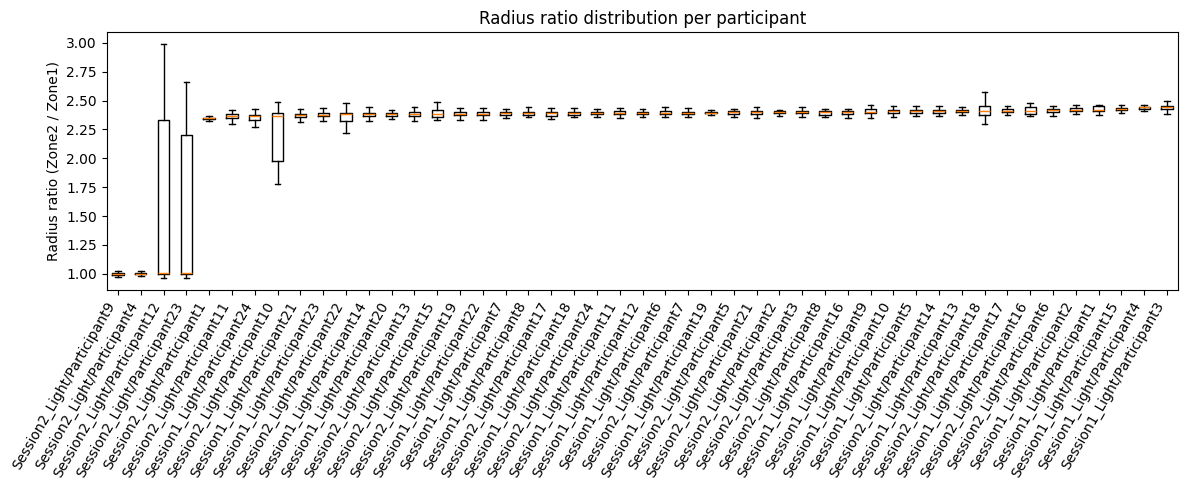

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def collect_radius_ratios(participants, data_path="./data/processed_data"):
    rows = []
    for par in participants:
        par_path = os.path.join(data_path, par)
        manual_file_path = os.path.join(par_path, "normalized_results_manual.txt")

        df = read_manual_results(manual_file_path)

        z1 = pd.to_numeric(df["Radius Zone 1"], errors="coerce")
        z2 = pd.to_numeric(df["Radius Zone 2"], errors="coerce")
        ratio = (z2 / z1).replace([np.inf, -np.inf], np.nan).dropna()

        rows.append(pd.DataFrame({"participant": par, "ratio": ratio.values}))

    return pd.concat(rows, ignore_index=True)

ratios_df = collect_radius_ratios(participants, data_path="./data/processed_data")

participants_order = (
    ratios_df.groupby("participant")["ratio"].median().sort_values().index.tolist()
)

data_for_box = [
    ratios_df.loc[ratios_df["participant"] == p, "ratio"].values
    for p in participants_order
]

plt.figure(figsize=(12, 5))
plt.boxplot(data_for_box, labels=participants_order, showfliers=False)
plt.xticks(rotation=60, ha="right")
plt.ylabel("Radius ratio (Zone2 / Zone1)")
plt.title("Radius ratio distribution per participant")
plt.tight_layout()
plt.show();

/var/folders/gb/gxv60mxj6mq7kw99sx7g1khm0000gn/T/ipykernel_74969/3181580046.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_pp, labels=labels, showfliers=False)


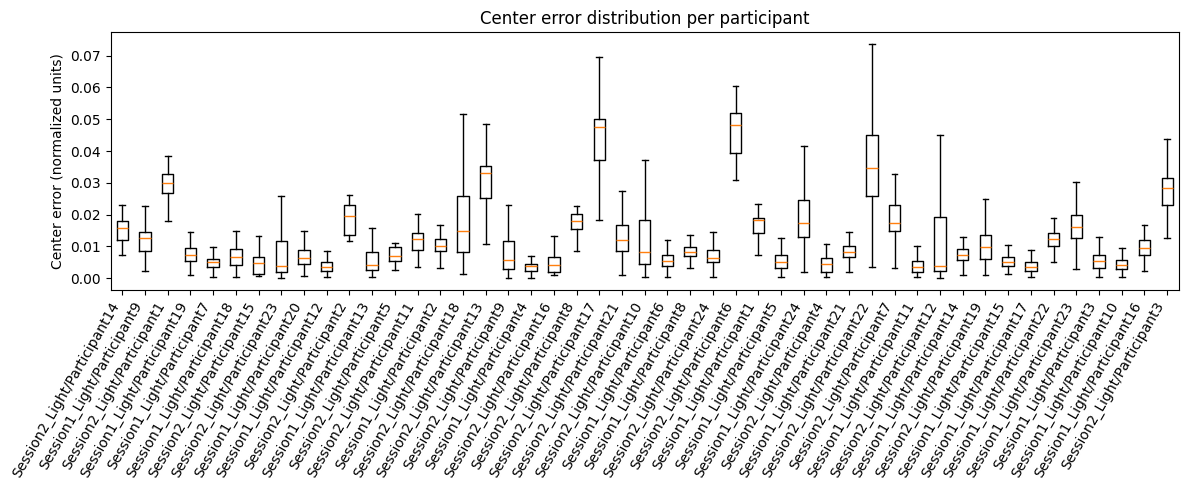

In [ ]:
import os
import matplotlib.pyplot as plt

from metrics import center_error_norm
from helpers import get_gt_circles

data_path = "./data/processed_data"

all_pp = []
labels = []

for par in participants:
    par_path = os.path.join(data_path, par)

    manual_file_path = os.path.join(par_path, "normalized_results_manual.txt")
    df = read_manual_results(manual_file_path)

    pp = []
    for i in range(len(df)):
        curr = df.iloc[i]

        _, r_gt, g_gt = get_gt_circles(curr)
        val = center_error_norm(r_gt, g_gt)
        pp.append(val)

    all_pp.append(pp)
    labels.append(par)

# Box plot: one box per participant
plt.figure(figsize=(12, 5))
plt.boxplot(all_pp, labels=labels, showfliers=False)
plt.xticks(rotation=60, ha="right")
plt.ylabel("Center error (normalized units)")
plt.title("Center error distribution per participant")
plt.tight_layout()
plt.show()
